# Introduction to Grouping

Lets use some sales data for these examples: https://www.kaggle.com/c/rossmann-store-sales/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#                                 to fix date, use parse_dates - pandas default = yyyy-dd-mm
df = pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])  
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
dfg = df.groupby("Store")

You can see everything you can do to this object here: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [5]:
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [6]:
store_avg = store_avg.reset_index()

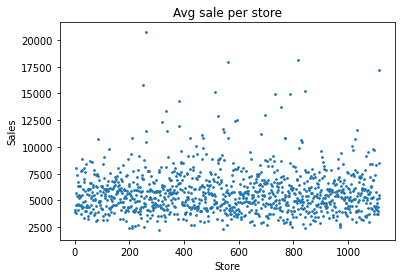

In [7]:
dfg                                     # s = The marker size
store_avg.plot.scatter("Store", "Sales", s=3, title="Avg sale per store");

## Multiple groups

In [8]:
store_day = df.groupby(["Store", "DayOfWeek"], as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


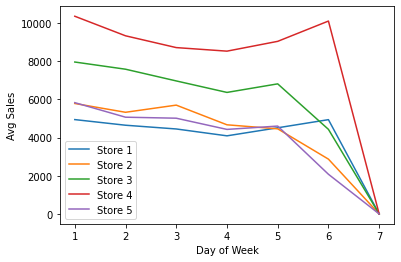

In [9]:
# breaking it in 5 stores - #TAG
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f"Store {store}")
plt.xlabel("Day of Week")
plt.ylabel("Avg Sales")
plt.legend();

## Continuous grouping?

In [10]:
df.groupby("Sales").mean().shape

(21734, 6)

In [11]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [12]:
# break in bands
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]

In [13]:
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df["SalesGroup"] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [14]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [15]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack()

DayOfWeek                    1     2     3     4     5      6      7
Store SalesGroup                                                    
1     (-0.001, 2000.0]     6.0   1.0   3.0  11.0   6.0    NaN  134.0
      (2000.0, 4000.0]    28.0  42.0  42.0  43.0  28.0   13.0    NaN
      (4000.0, 6000.0]    70.0  80.0  83.0  72.0  91.0  109.0    NaN
      (6000.0, 8000.0]    26.0  12.0   7.0   9.0   9.0   10.0    NaN
      (8000.0, 10000.0]    4.0   NaN   NaN   NaN   1.0    2.0    NaN
...                        ...   ...   ...   ...   ...    ...    ...
1115  (2000.0, 4000.0]    15.0  17.0  15.0   9.0   NaN    NaN    NaN
      (4000.0, 6000.0]    34.0  54.0  65.0  64.0  61.0   36.0    NaN
      (6000.0, 8000.0]    30.0  52.0  39.0  39.0  50.0   80.0    NaN
      (8000.0, 10000.0]   37.0   9.0  12.0  10.0  11.0   16.0    NaN
      (10000.0, 50000.0]  12.0   2.0   1.0   2.0   7.0    2.0    NaN

[6263 rows x 7 columns]

In [16]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value=0).head(10)

DayOfWeek                 1   2   3   4   5    6    7
Store SalesGroup                                     
1     (-0.001, 2000.0]    6   1   3  11   6    0  134
      (2000.0, 4000.0]   28  42  42  43  28   13    0
      (4000.0, 6000.0]   70  80  83  72  91  109    0
      (6000.0, 8000.0]   26  12   7   9   9   10    0
      (8000.0, 10000.0]   4   0   0   0   1    2    0
2     (-0.001, 2000.0]    6   1   3   8   6    1  134
      (2000.0, 4000.0]   24  28   3  25  30  125    0
      (4000.0, 6000.0]   30  57  65  87  92    8    0
      (6000.0, 8000.0]   58  43  60  13   7    0    0
      (8000.0, 10000.0]  13   4   3   2   0    0    0

In [17]:
df.groupby(["Store", "SalesGroup", "DayOfWeek"]).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64

In [18]:
#df.groupby(["Store", "SalesGroup", "DayOfWeek"]).count().head(42)
# is == df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value=0).head(10)
df.groupby(["Store", "SalesGroup","DayOfWeek"]).DayOfWeek.count().unstack(fill_value=0).head(6)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
      (10000.0, 50000.0]   0   0   0   0   0    0    0

We can also use crosstab and pivot for these, we'll get to that in a later chapter, so get keen.

### Recap

* 1 groupby
* 2 reset_index 
    2.1 You can call reset index or simply pass the as index equals false in .
    2.2 If you have continuous data that you want to group on. But you can't because it's continuous you can descriptives it using the cut method. And then if you have from a multilayer group, a    very large multi index object, you can try and unwrap that and format that into a data frame, go from what's called long format to wide format data using the unstaffed method.
* cut
* unstack